In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets

from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_diabetes

%matplotlib inline

In [6]:
diabetes_data = load_diabetes()

df = pd.DataFrame(data=diabetes_data['data'], columns=diabetes_data['feature_names'])
df['target'] = diabetes_data['target']

print(df.shape)

df.head()

(442, 11)


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

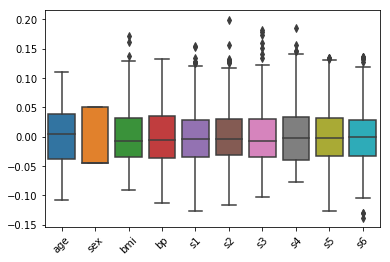

In [7]:
df_without_target = df.loc[:, df.columns != 'target']

sns.boxplot(data=df_without_target)
plt.xticks(rotation=45)

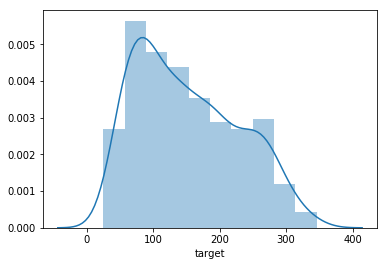

In [8]:
sns.distplot(df['target'])


In [10]:
variables = df.columns[ : -1]
X = df[variables].values

target = df.columns[-1]
Y = df[target].values

print('X shape: {}'.format(X.shape))
print('Y shape: {}'.format(Y.shape))


X shape: (442, 10)
Y shape: (442,)


In [11]:
from sklearn.model_selection import train_test_split

# create training and testing vars
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)

print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(309, 10) (309,)
(133, 10) (133,)


In [12]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [13]:
Y_pred = lr.predict(X_test)


In [14]:

print('Mean Absolute Error (MAE): {}'.format(mean_absolute_error(Y_test, Y_pred)))
print('Variance score (R^2): {}'.format(r2_score(Y_test, Y_pred)))

Mean Absolute Error (MAE): 43.889882400483366
Variance score (R^2): 0.4848109247493312


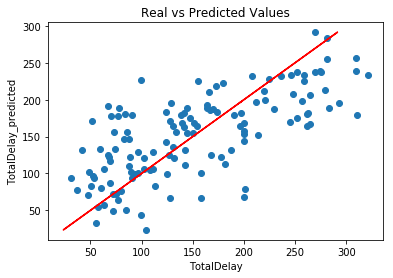

In [15]:
plt.title('Real vs Predicted Values')
plt.xlabel('TotalDelay')
plt.ylabel('TotalDelay_predicted')

plt.scatter(Y_test, Y_pred)
plt.plot(Y_pred, Y_pred, color='red')